# Training Machine Learning Model on Tabular Data

This tutorial covers the following steps:
- Import white and red wine data
- Visualize the data using Seaborn and matplotlib
- Fit a RandomForestClassifier as a Baseline Model
- Examine the learned feature importances

In this example, you build a model to predict the quality of Portugese "Vinho Verde" wine based on the wine's physicochemical properties. 

The example uses a dataset from the UCI Machine Learning Repository, presented in [*
Modeling wine preferences by data mining from physicochemical properties*](https://www.sciencedirect.com/science/article/pii/S0167923609001377?via%3Dihub) [Cortez et al., 2009].

### Setup
- This notebook requires Databricks Runtime for Machine Learning.

## Importing Data

In [0]:
# Download the red wine quality data
%sh wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

--2021-01-26 11:07:46-- https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘winequality-red.csv’

 0K .......... .......... .......... .......... .......... 60% 831K 0s
 50K .......... .......... .......... .. 100% 1.13M=0.09s

2021-01-26 11:07:46 (935 KB/s) - ‘winequality-red.csv’ saved [84199/84199]

/bin/bash: line 1: fg: no job control

In [0]:
# Download the white wine quality data
%sh wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

--2021-01-26 11:08:11-- https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264426 (258K) [application/x-httpd-php]
Saving to: ‘winequality-white.csv’

 0K .......... .......... .......... .......... .......... 19% 821K 0s
 50K .......... .......... .......... .......... .......... 38% 895K 0s
 100K .......... .......... .......... .......... .......... 58% 41.4M 0s
 150K .......... .......... .......... .......... .......... 77% 1.77M 0s
 200K .......... .......... .......... .......... .......... 96% 67.4M 0s
 250K ........ 100% 12.1M=0.1s

2021-01-26 11:08:11 (1.72 MB/s) - ‘winequality-white.csv’ saved [264426/264426]

In [0]:
import pandas as pd

wine_data_path_red = "file:/databricks/driver/winequality-red.csv"
wine_data_path_white = "file:/databricks/driver/winequality-white.csv"

white_wine = pd.read_csv(wine_data_path_red, sep=';')
red_wine = pd.read_csv(wine_data_path_white, sep=';')

Merge the two DataFrames into a single dataset, with a new binary feature "is_red" that indicates whether the wine is red or white.

In [0]:
red_wine['is_red'] = 1
white_wine['is_red'] = 0

# Concatenate the red_wine and white_wine dataframes
data =

# Remove spaces from column names
data.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

In [0]:
data.head()

Out[9]:

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


##Data Visualization

Before training a model, explore the dataset using Seaborn and Matplotlib.

Plot a histogram of the dependent variable, quality.

Out[10]:

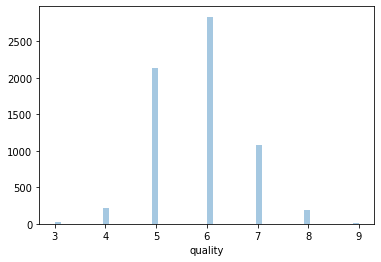

<matplotlib.axes._subplots.AxesSubplot at 0x7f7aab6dfe90>

In [0]:
import seaborn as sns
sns.distplot(data.quality, kde=False)

Looks like quality scores are normally distributed between 3 and 9.

In [0]:
# Define wine as high quality if it has quality >= 7
high_quality =
data.quality = high_quality

Box plots are useful in noticing correlations between features and a binary label.

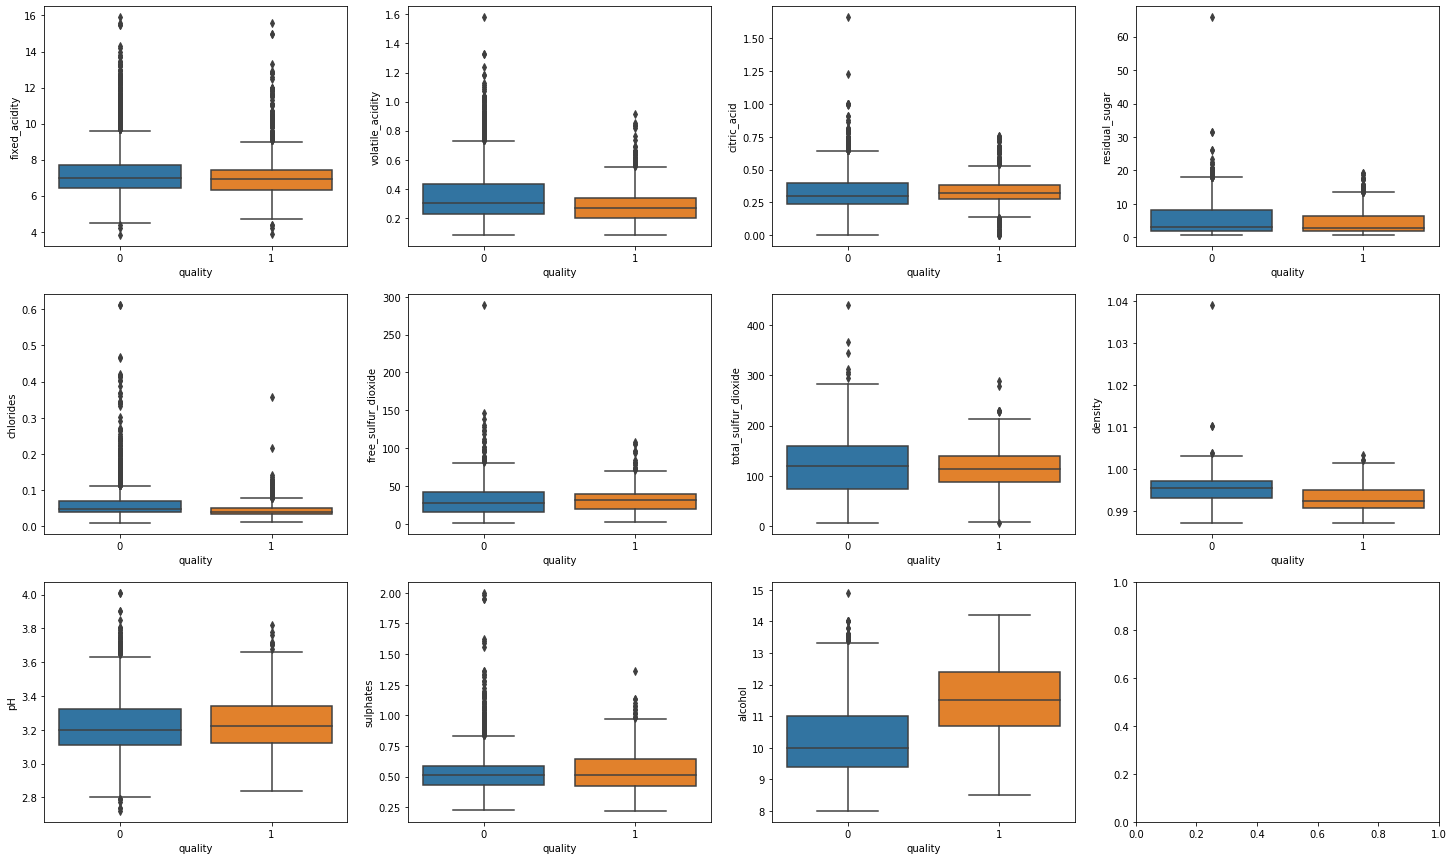

In [0]:
import matplotlib.pyplot as plt

dims = (3, 4)

f, axes = plt.subplots(dims[0], dims[1], figsize=(25, 15))
axis_i, axis_j = 0, 0
for col in data.columns:
  if col == 'is_red' or col == 'quality':
    continue # Box plots cannot be used on indicator variables
  sns.boxplot(x=high_quality, y=data[col], ax=axes[axis_i, axis_j])
  axis_j += 1
  if axis_j == dims[1]:
    axis_i += 1
    axis_j = 0

In the above box plots, a few variables stand out as good univariate predictors of quality. 

- In the alcohol box plot, the median alcohol content of high quality wines is greater than even the 75th quantile of low quality wines. High alcohol content is correlated with quality.
- In the density box plot, low quality wines have a greater density than high quality wines. Density is inversely correlated with quality.

## Preprocessing Data
Prior to training a model, check for missing values and split the data into training and validation sets.

In [0]:
data.isna().any()

Out[13]: fixed_acidity False
volatile_acidity False
citric_acid False
residual_sugar False
chlorides False
free_sulfur_dioxide False
total_sulfur_dioxide False
density False
pH False
sulphates False
alcohol False
quality False
is_red False
dtype: bool

There are no missing values.

In [0]:
from sklearn.model_selection import train_test_split

# Split the data and use quality as the target
train, test = 
X_train = 
X_test = 
y_train =
y_test = 

## Building a Baseline Model

This task seems well suited to a random forest classifier, since the output is binary and there may be interactions between multiple variables.

The following code builds a simple classifier using scikit-learn. It uses MLflow to keep track of the model accuracy, and to save the model for later use.

In [0]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Fit a RandomForestClassifier with n_estimators
n_estimators = 10
model = RandomForestClassifier(n_estimators=, random_state=np.random.RandomState(123))


# predict_proba returns [prob_negative, prob_positive], so slice the output with [:, 1]
predictions_test = model.predict_proba(X_test)[:,1]
# Get the roc_auc_score using your y_test and predictions_test 
auc_score = 
auc_score

Out[21]: 0.8797588517831083

Examine the learned feature importances output by the model as a sanity-check.

In [0]:
feature_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns.tolist(), columns=['importance'])
feature_importances.sort_values('importance', ascending=False)

Out[19]:

,importance
alcohol,0.166131
density,0.106301
volatile_acidity,0.086660
pH,0.085085
sulphates,0.084661
total_sulfur_dioxide,0.082139
free_sulfur_dioxide,0.082102
citric_acid,0.081057
residual_sugar,0.079245
chlorides,0.078470


As illustrated by the boxplots shown previously, both alcohol and density are important in predicting quality.